In [2]:
# Import libraries:
import pandas as pd
import importlib   
import dt_ids7_export_utils as bh_utils
import elfys_functions as bh_elfys
import plot_functions as bh_plot

importlib.reload(bh_utils)
importlib.reload(bh_elfys)
importlib.reload(bh_plot)

# Get the name of the computer:
import socket
hostname = socket.gethostname()
if hostname == 'BHs-Desktop':
    path = 'E:\\'
elif hostname == 'BH-XPS':
    path = 'G:\\'
else:
    path = 'D:\\'

del hostname
# Import the data:
df_ids7 = pd.read_excel(path + 'RRH ELfys Ids7.xlsx')
df_dt = pd.read_excel(path + 'DoseTrack RRH Elfys reduced.xlsx')

del path


# Run all cleanups, filters and checks:
df_ids7 = bh_utils.run_all_cleanup_filters_and_checks(df_ids7, df_dt, False)
# Check for accession numbers that exists in DoseTrack but not in Ids7:
df_dt = bh_utils.check_accession_dt_vs_ids7(df_dt, df_ids7, False)

# First we perform mapping on selected procedures:
df_ids7 = bh_elfys.map_procedures(df_ids7, False)
# Merge the dataframes:
data = bh_utils.merge_ids7_dt(df_ids7, df_dt, False)
# Then we filter the interesting procedures:
data = bh_elfys.filter_procedures(data, False)
del df_dt, df_ids7

In [ ]:
# Plot RGA Cor Ablasjon SVT \(int\.\) m og u 3D.:
bh_plot.plot_representative_dose(data, 'RGA Cor Ablasjon SVT \(int\.\) m og u 3D.', False)


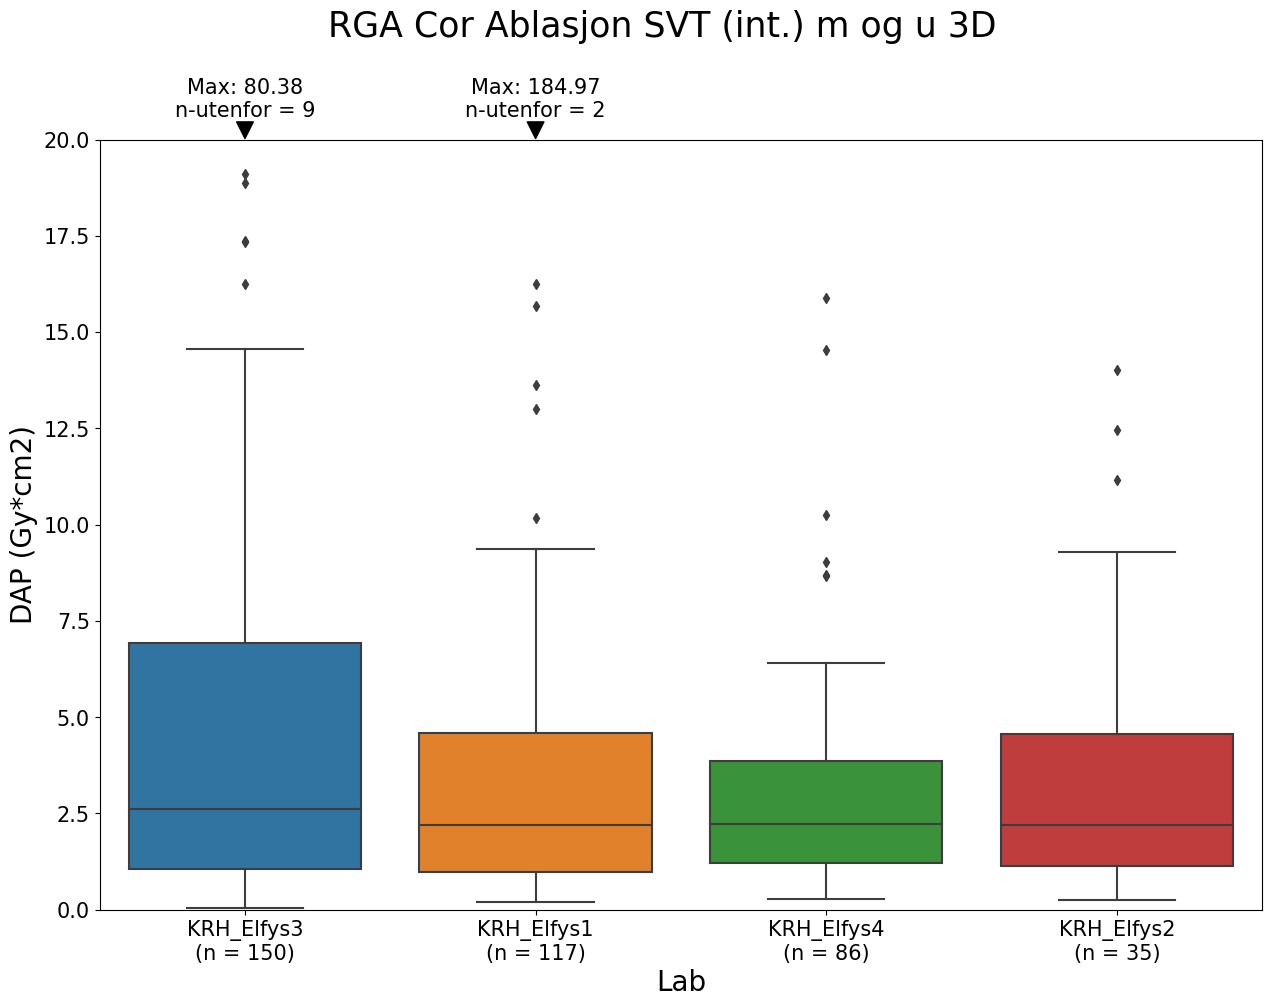

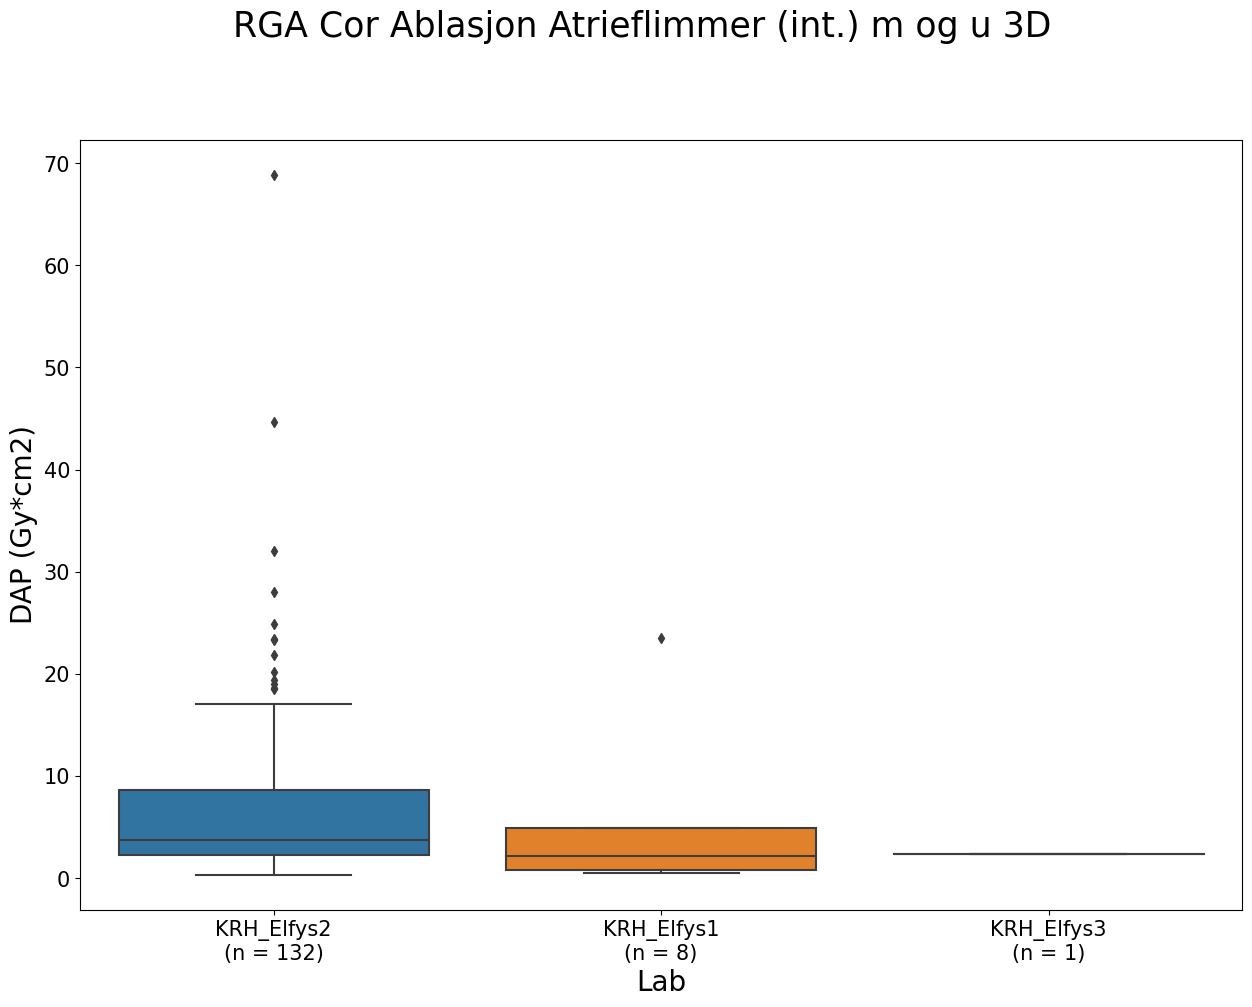

In [3]:
# Beware, there is a bug here.
# The labeling of the procedures is not correct, and is shuffeled by the sorting somehow.

procedure = 'RGA Cor Ablasjon SVT (int.) m og u 3D'
bh_plot.plot_representative_dose(data, procedure, 20, False)

procedure = 'RGA Cor Ablasjon Atrieflimmer (int.) m og u 3D'
bh_plot.plot_representative_dose(data, procedure, -1, False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
procedure = 'RGA Cor Ablasjon SVT (int.) m og u 3D'
data_ = data[data['Beskrivelse'] == procedure]
data_ = data_.sort_values(by=['Modality Room'])
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x='Modality Room', y='DAP Total (Gy*cm2)', data=data_, ax=ax)
